# TP NLP - Word2Vec
- Vinícius Alexandre da Silva

<https://vasilva.github.io/NLP-word2vec/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hiper-Parâmtros utilizados

Após rodar o Word2Vec com os seguintes hiper-parâmtros:

-   `Size`: 50, 100, 150, 200
-   `Window`: 3, 5, 8, 10
-   `Iterações`: 5, 8, 10, 20
-   `CBOW` ou `Skip-Gram`

Tendo no total 128 configurações diferentes.

# Tabela de Resultados

In [2]:
results = pd.read_csv("results.csv")
results

Size  Window  Iter CBOW or Skip-gram      RMSE
0     100      10    10              CBOW  1.060807
1     100      10    10         Skip-Gram  0.933797
2     100      10    20              CBOW  1.057806
3     100      10    20         Skip-Gram  0.957117
4     100      10     5              CBOW  1.049821
..    ...     ...   ...               ...       ...
123    50       8    20         Skip-Gram  0.892788
124    50       8     5              CBOW  1.024465
125    50       8     5         Skip-Gram  0.834142
126    50       8     8              CBOW  1.031018
127    50       8     8         Skip-Gram  0.860637

[128 rows x 5 columns]

Temos essa tabela com o resultados.

## Cálculo da Raiz quadrada do erro-médio (RMSE)

O cálculo do `RMSE` foi feito a partir da Distância Cosseno dos valores previstos e os reais. 

$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(dist_{cos}(y,\hat{y}))^2}
$

$
Dist_{cos} = 1 - \frac{y \cdot \hat{y}}{\left\| y \right\|\left\| \hat{y} \right\|}
$

# Melhor e Pior Resultado

Primeiramente vamos ver o melhor e pior resultados:

In [3]:
cbow_data = results[results["CBOW or Skip-gram"] == "CBOW"]
skipgram_data = results[results["CBOW or Skip-gram"] == "Skip-Gram"]
figsize = (4, 10)
figmulti = (4, 12)
lim = (0.65, 1.15)
palette = "tab10"

In [31]:
best_result = results.loc[results["RMSE"].idxmin()]
print(best_result)

Size                        50
Window                       3
Iter                         5
CBOW or Skip-gram    Skip-Gram
RMSE                  0.770649
Name: 109, dtype: object


In [30]:
worst_result = results.loc[results["RMSE"].idxmax()]
print(worst_result)

Size                      150
Window                     10
Iter                       10
CBOW or Skip-gram        CBOW
RMSE                 1.063259
Name: 32, dtype: object


Como vamos ver, valores menores de hiper-parâmetros e o uso de skip-gram tendem a ter resultados melhores.

# Gráficos

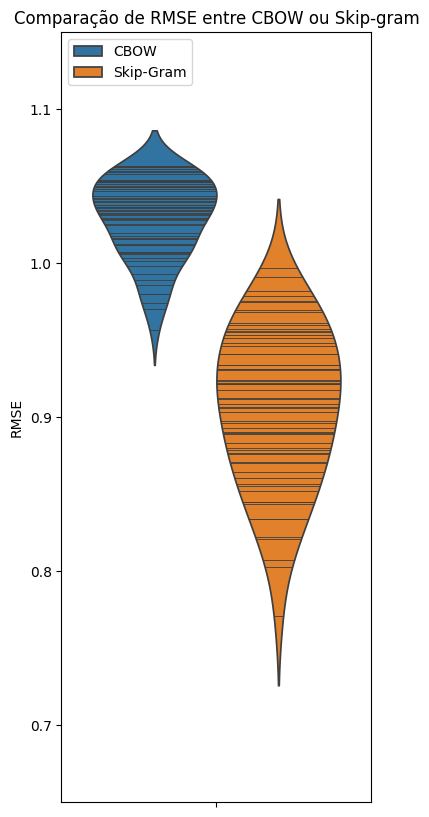

In [4]:
plt.figure(figsize=figsize)
sns.violinplot(
    results, y="RMSE", hue="CBOW or Skip-gram", inner="stick", palette=palette
)
plt.ylabel("RMSE")
plt.title("Comparação de RMSE entre CBOW ou Skip-gram")
plt.legend(loc="upper left")
plt.ylim(lim)
plt.show()

## Skip-Gram vs CBOW

Skip-Gram tende a resultar em melhores resultados que CBOW.

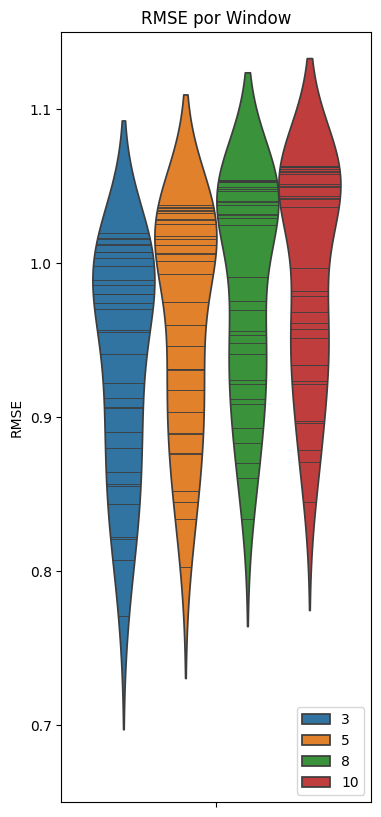

In [5]:
plt.figure(figsize=figsize)
sns.violinplot(results, y="RMSE", hue="Window", inner="stick", palette=palette)
plt.ylabel("RMSE")
plt.title("RMSE por Window")
plt.legend(loc="lower right")
plt.ylim(lim)
plt.show()

## Comparação por tamanho de janela (Window)

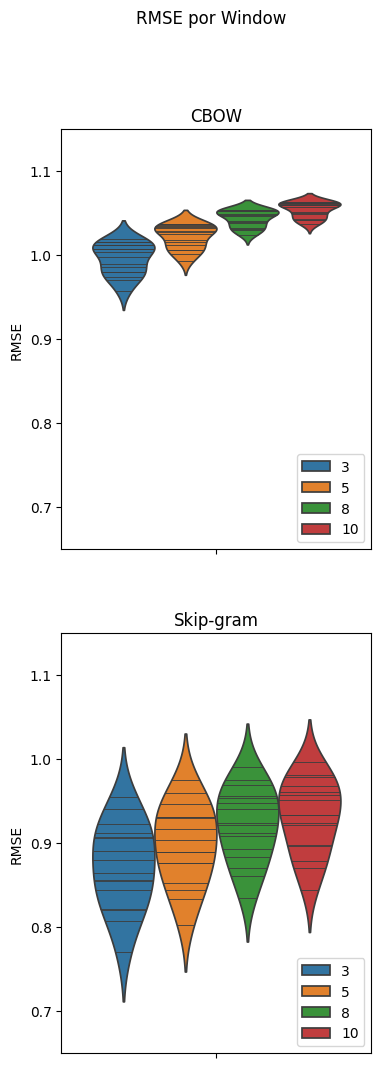

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("RMSE por Window")
fig.set_size_inches(figmulti)
sns.violinplot(
    cbow_data, y="RMSE", hue="Window", inner="stick", palette=palette, ax=ax1
)
ax1.set_title("CBOW")
ax1.set_ylabel("RMSE")
ax1.set_ylim(lim)
ax1.legend(loc="lower right")
sns.violinplot(
    skipgram_data, y="RMSE", hue="Window", inner="stick", palette=palette, ax=ax2
)
ax2.set_title("Skip-gram")
ax2.set_ylabel("RMSE")
ax2.set_ylim(lim)
ax2.legend(loc="lower right")
plt.show()

Há uma pequena vantagem com janelas menores

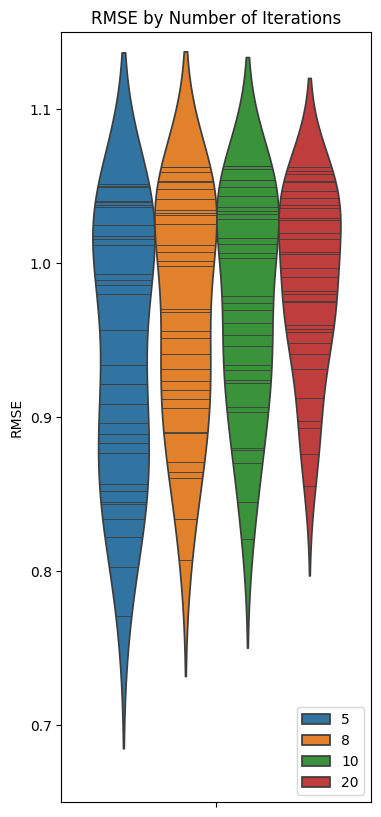

In [7]:
plt.figure(figsize=figsize)
sns.violinplot(results, y="RMSE", hue="Iter", inner="stick", palette=palette)
plt.ylabel("RMSE")
plt.title("RMSE by Number of Iterations")
plt.legend(loc="lower right")
plt.ylim(lim)
plt.show()

Separando entre CBOW e Skip-Gram, temos a mesma tendência, com Skip-Gram com valores mais variados, porém menores que CBOW.

## Comparação por Número de Iterações

Há uma pequena vantagem com menos iterações, indicando que um número alto possa causar overfitting.

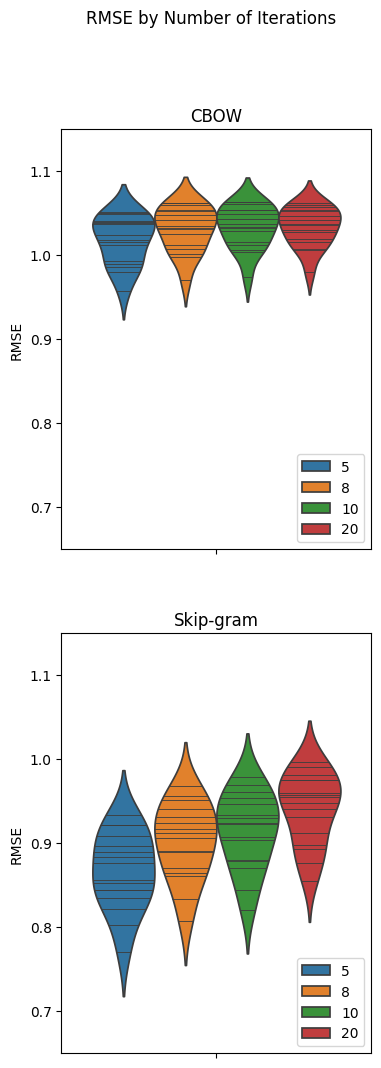

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("RMSE by Number of Iterations")
fig.set_size_inches(figmulti)
sns.violinplot(cbow_data, y="RMSE", hue="Iter", inner="stick", palette=palette, ax=ax1)
ax1.set_title("CBOW")
ax1.set_ylabel("RMSE")
ax1.set_ylim(lim)
ax1.legend(loc="lower right")
sns.violinplot(
    skipgram_data, y="RMSE", hue="Iter", inner="stick", palette=palette, ax=ax2
)
ax2.set_title("Skip-gram")
ax2.set_ylabel("RMSE")
ax2.set_ylim(lim)
ax2.legend(loc="lower right")
plt.show()

Vemos quase nenhuma diferença em CBOW, mas uma diferença perceptível em Skip-Gram, mostrando as diferenças na rapidez de convergência entre os dois algoritmos. CBOW, sendo mais lento, requer um número de iterações bem maior para atingir o que Skip-Gram atinge com um número pequeno de iterações.

## Comparação por Tamanho do Embedding (Size)

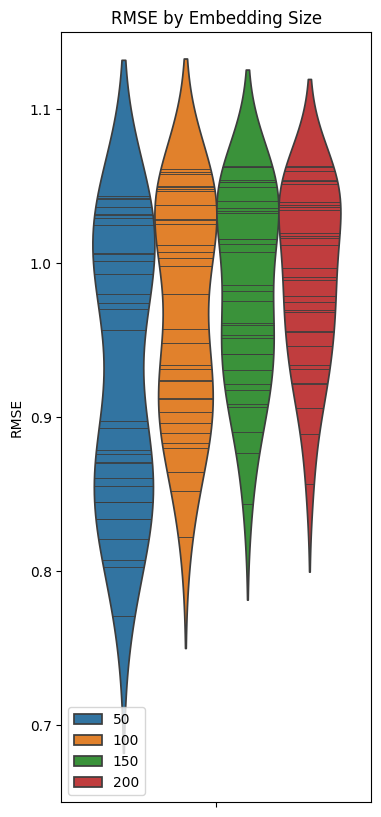

In [9]:
plt.figure(figsize=figsize)
sns.violinplot(results, y="RMSE", hue="Size", inner="stick", palette=palette)
plt.ylabel("RMSE")
plt.title("RMSE by Embedding Size")
plt.legend(loc="lower left")
plt.ylim(lim)
plt.show()

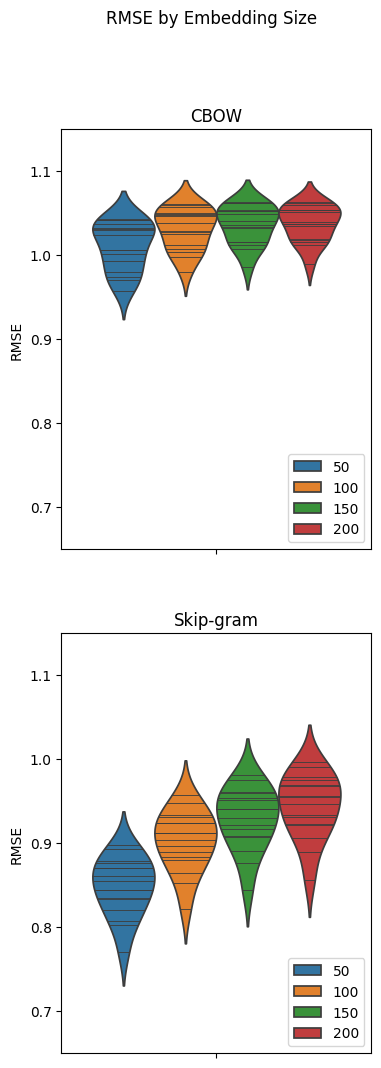

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("RMSE by Embedding Size")
fig.set_size_inches(figmulti)
sns.violinplot(cbow_data, y="RMSE", hue="Size", inner="stick", palette=palette, ax=ax1)
ax1.set_title("CBOW")
ax1.set_ylabel("RMSE")
ax1.set_ylim(lim)
ax1.legend(loc="lower right")
sns.violinplot(
    skipgram_data, y="RMSE", hue="Size", inner="stick", palette=palette, ax=ax2
)
ax2.set_title("Skip-gram")
ax2.set_ylabel("RMSE")
ax2.set_ylim(lim)
ax2.legend(loc="lower right")
plt.show()

Temos um melhor resultado com `Size` = 50, com maior diferença em Skip-Gram do que CBOW.